In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn
import gc

gc.collect()

0

In [2]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
#load our train and test datasets.

train = pd.read_csv("~/datasets/mnist/train.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Splitting train dataset into X and Y.Normalizing it by dividing it with 255

X = train.iloc[:,1:].values / 255
Y = train.iloc[:,0].values

In [6]:
#reshaping images to 28x28x1(3D) pixels.

X = X.reshape(-1, 28, 28,1)

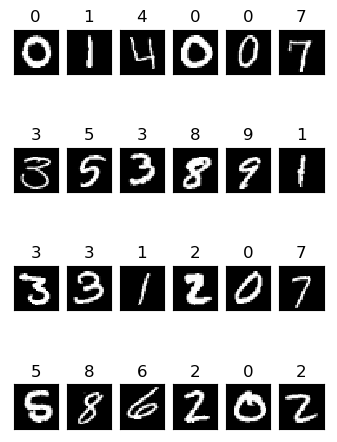

In [7]:
#visulaizing numbers in our dataset.
r = 4
c = 6
fig=plt.figure(figsize=(r, c),dpi=100)
for i in range(1, r*c+1):
    img = X[i].reshape(28,28)
    ax = fig.add_subplot(r, c, i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.title.set_text(Y[i])
    
    plt.imshow(img,cmap='gray')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

trn_x,val_x,trn_y,val_y = train_test_split(X,Y,test_size=0.2)

In [9]:
shape = trn_x[0].shape
shape

(28, 28, 1)

![CNN](https://cdn-images-1.medium.com/max/1909/1*vkQ0hXDaQv57sALXAJquxA.jpeg "CNN")

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D

model = Sequential()
model.add(Conv2D(32,kernel_size=(4,4),input_shape=shape,activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(16,kernel_size=(4,4),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(10,activation="softmax"))

Using TensorFlow backend.


In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [12]:
epochs=10
history = model.fit(trn_x,trn_y,batch_size=32,epochs=epochs,validation_data=(val_x,val_y))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 6s 170us/step - loss: 0.2329 - acc: 0.9277 - val_loss: 0.0765 - val_acc: 0.9745
Epoch 2/10
33600/33600 [==============================] - 4s 127us/step - loss: 0.0807 - acc: 0.9749 - val_loss: 0.0607 - val_acc: 0.9807
Epoch 3/10
33600/33600 [==============================] - 4s 128us/step - loss: 0.0610 - acc: 0.9809 - val_loss: 0.0469 - val_acc: 0.9861
Epoch 4/10
33600/33600 [==============================] - 4s 106us/step - loss: 0.0460 - acc: 0.9853 - val_loss: 0.0518 - val_acc: 0.9846
Epoch 5/10
33600/33600 [==============================] - 5s 136us/step - loss: 0.0410 - acc: 0.9866 - val_loss: 0.0454 - val_acc: 0.9868
Epoch 6/10
33600/33600 [==============================] - 5s 136us/step - loss: 0.0345 - acc: 0.9882 - val_loss: 0.0398 - val_acc: 0.9894
Epoch 7/10
33600/33600 [==============================] - 5s 138us/step - loss: 0.0305 - acc: 0.9899 - val_loss: 0.0430 - v

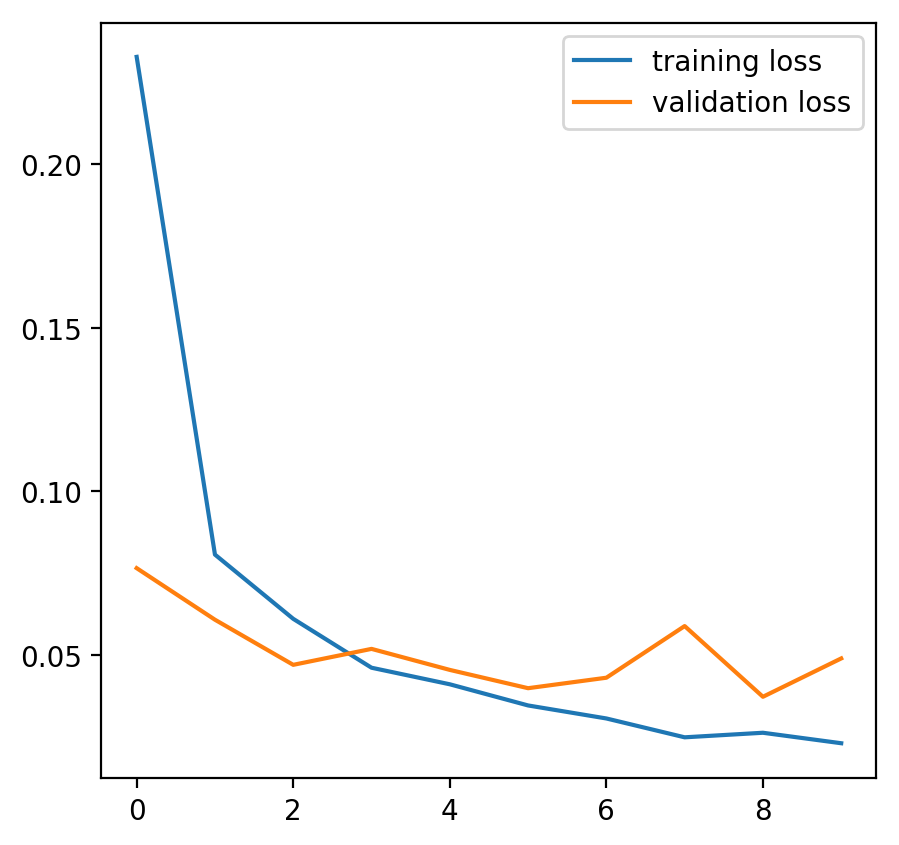

In [13]:
plt.figure(figsize=(5,5),dpi=200)
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend(loc='upper right')

In [14]:
#predicting validation set and plotting a heatmap.


pred = model.predict_classes(val_x)

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(val_y,pred)

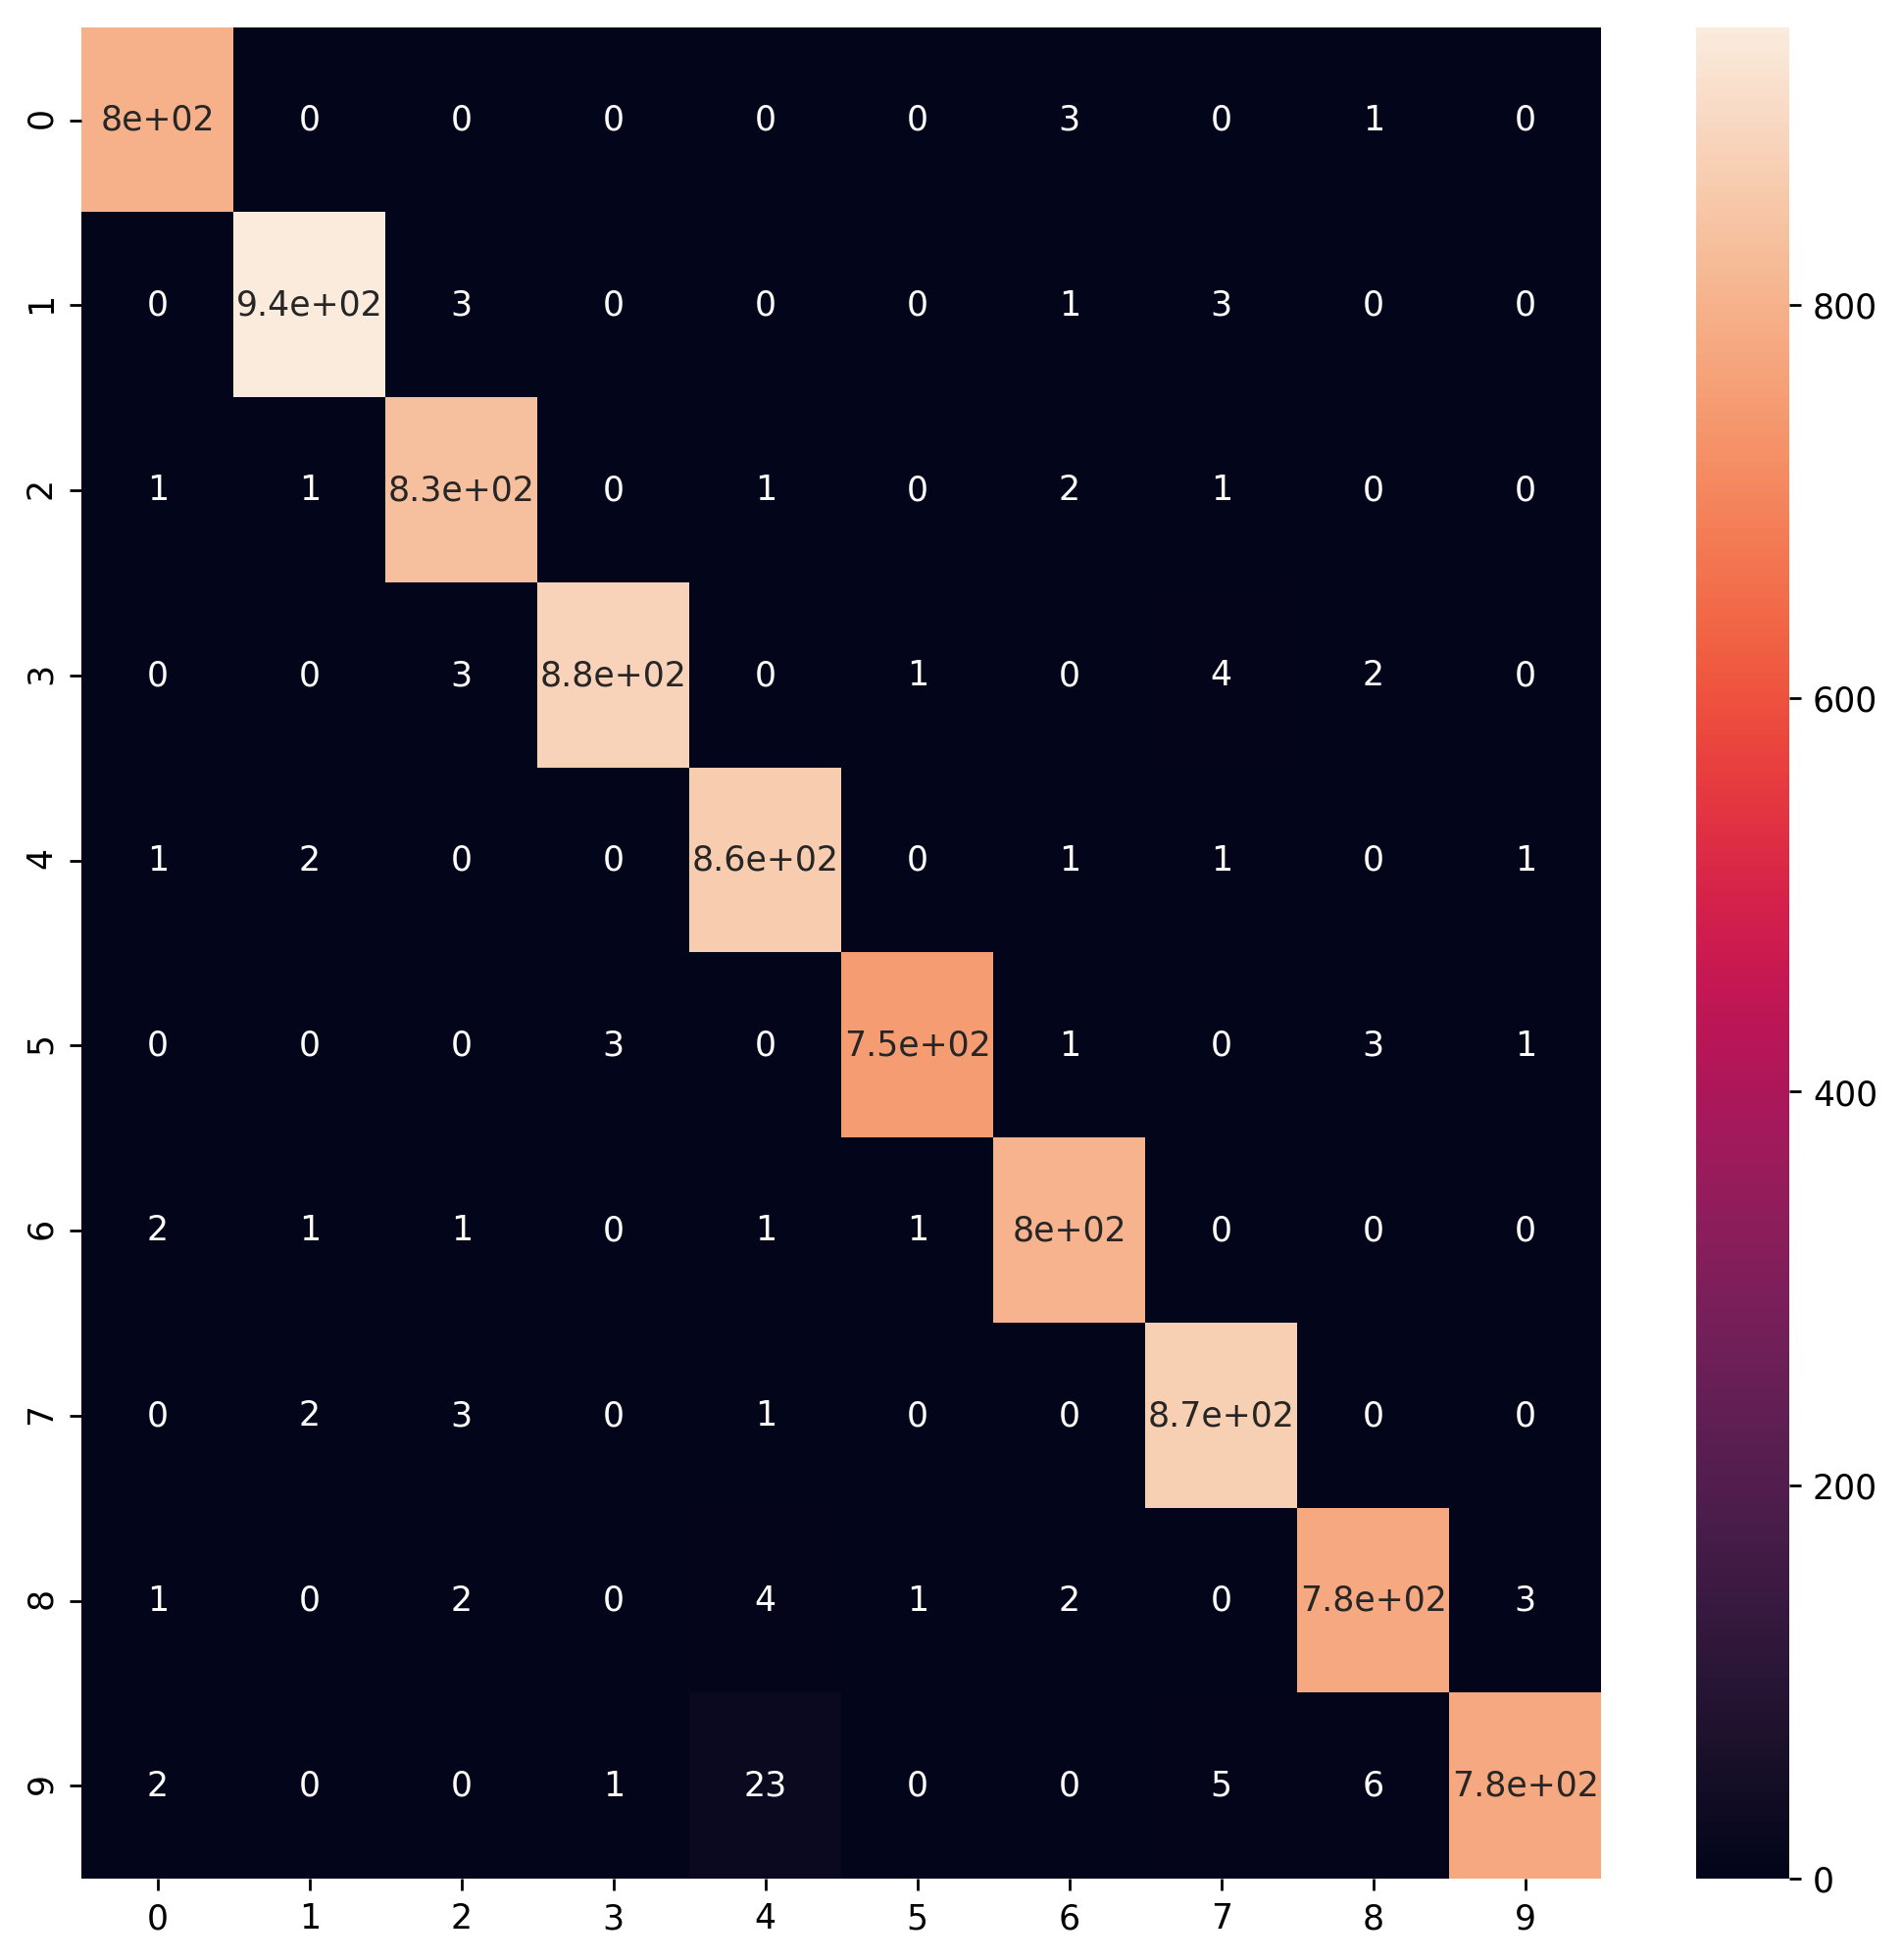

In [16]:
plt.figure(figsize = (10,10),dpi=250)
seaborn.heatmap(cm,annot=True)

In [17]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(val_y,pred)

print("Accuracy:",acc*100,"%")

Accuracy: 98.7738095238 %
